# Medidores de tendência central

É uma medida resumida que se propõe a descrever um conjunto de dados com um único valor. Existem basicamente três medidores de tendência central, sendo eles a [Moda](#moda), [Mediana](#mediana) e [Média](#média).

## Moda

É o valor que tem a maior frequência em um determinada distribuicão de dados.

### Exemplo 1 (variável qualitativa)

Em uma determinada amostra do tempo de falha dos equipamentos em uma determinada fábrica, podemos saber qual o moda da amostra, ou seja, qual equipamento é listado mais vezes com ocorrência de falha em  um determinado mês de trabalho?

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

In [45]:
# Selecionar mês entre três
mes = 1

In [46]:
# Carregando os dados
df = pd.read_csv("./falhas.csv")

# Filtrando dados para o mês
mes_df = df[df['month'] == mes]

# Agrupando por equipamento e extraindo a frequência
mes_grouped = mes_df['machine type'].value_counts()

print('Equipamentos agrupados por frequência de ocorrência de falhas')
print(mes_grouped, end = '\n\n')
print('\x1b[31m Moda da amostra: {}\x1b[0m'.format(max(mes_grouped.values)))

Equipamentos agrupados por frequência de ocorrência de falhas
OPEN GATE - BILANCELA                       9
PINÇA AUTOMATICA                            8
TRANSPORTADOR ROLETES ELEVAÇÃO POR BIELA    4
DISPOSITIVO DIMENSIONAL LATERAL             2
ROBO                                        1
PAINEL DE SOLDA                             1
Name: machine type, dtype: int64

 Moda da amostra: 9


**O equipamento *open gate - bilancela* é a moda da amostra pois possui a maior quantidade de ocorrência de falhas para o mês 1**

### Exemplo 2 (variável quantitativa)

Analisando os dados de falhas do três meses da amostra é possível coletar o tempo de falha que possui a maior ocorrência, ou seja, por ocorrência de falha qual o valor do tempo de falha que tem maior frequência?

In [19]:
df

,month,failure time(min),machine type
0,1,17,TRANSPORTADOR ROLETES ELEVAÇÃO POR BIELA
1,1,15,TRANSPORTADOR ROLETES ELEVAÇÃO POR BIELA
2,1,11,OPEN GATE - BILANCELA
3,1,5,OPEN GATE - BILANCELA
4,1,6,OPEN GATE - BILANCELA
...,...,...,...
70,3,2,PINÇA AUTOMATICA
71,3,9,DISPOSITIVO DIMENSIONAL LATERAL
72,3,3,OPEN GATE - BILANCELA
73,3,7,OPEN GATE - BILANCELA


In [47]:
print('Frequência de ocorrência para cada tempo de | falha tempo(m) - freq.')
ser_freq_time = df['failure time(min)'].value_counts()
print(ser_freq_time, end = "\n\n")
print('\x1b[31m Moda da amostra: {}\x1b[0m'.format(ser_freq_time.idxmax()))

Frequência de ocorrência para cada tempo de | falha tempo(m) - freq.
4      13
2      12
3      12
5       9
11      6
14      3
6       3
7       3
8       2
10      2
17      2
9       2
19      1
35      1
257     1
12      1
15      1
66      1
Name: failure time(min), dtype: int64

 Moda da amostra: 4


**4 minutos de tempo de falha e a moda pois possui a maior quantidade de ocorrência para a amostra**

### Mais sobre a moda

- Pode ser utilizada tanto para variável **qualitativa** e **quantitativa**
- Pode nao refletir bem o centro da distribuição
- Determinado conjunto de dados pode ter duas modas
- Amostras com variáveis do tipo **quantitativa contínua** podem nao ter moda

***

## Mediana

A mediana e o elemento do meio de uma determinada distribuição de dados quando os valores estão arranjados em ordem crescente ou decrescente.

### Exemplo 1

A seguir iremos analisar os dados de tempo de navegacão para uma determinada missao cumprida pelo **turtlebot3** utilizando o algoritmo **A***. Foi calculado o tempo em segundos que o **turtlebot3** levava para sair de um ponto inicial ate um ponto final.


<p align="center">
  <img src="./resources/mission2.png" width="686" height="350"/>
</p>

In [50]:
# Dados de navegacao da missao em segundos
astar = (
    23.2, 27.4, 26.0, 23.0, 28.2, 26.1,
    26.6, 25.9, 24.5, 41.9, 22.9, 26.9,
    24.2, 24.4, 26.1, 22.8, 23.2, 28.4,
    26.0, 23.3, 23.5, 30.1, 22.8, 25.3,
    23.4, 24.9, 25.3, 25.2, 23.5, 33.2
)

print('\x1b[31m Mediana dos dados: {}\x1b[0m'.format(np.median(astar)))

 Mediana dos dados: 25.25


**25.25 segundos e a mediana da distribuicão**

### Mais sobre a mediana

- A mediana e menos afetada por valores atípicos (outliers)
- Pode ser melhor aplicada no caso em que a distribuição não e simétrica
- Nao pode ser utilizada em casos de variável qualitativa nominal

***

## Média

É a soma dos valores de cada observacão dividido pelo numero de observações.

$$\bar{X} = \frac{\sum x}{N}$$

### Exemplo 1

Para o exemplo de navegação com o **turtlebot3** podemos calcular a media da distribuição

In [52]:
# Media da amostra
print('\x1b[31m Média dos dados: {}\x1b[0m'.format(np.mean(astar)))

 Média dos dados: 25.94


**25.94 segundos é a média da distribuição**

### Mais sobre a media

- A média pode ser calculada para variável quantitativa contínua e discreta
- A média não pode ser calculada para variável qualitativa
- Pode ser influenciada por valores atípicos (outliers)

***

## Medidores de tendencia central e o formato da distribuicao

O formato de uma distribuição esta diretamente ligado a [média](#média), [mediana](#mediana) e [moda](#moda), e possível fazer algumas análises a respeito dos medidores a partir do formato de um histograma.

- Distribuição simétrica : Os dados se encontram centralizados
  - **Media = Mediana = Moda**
- Distorção positiva: Os dados se encontram na porção a esquerda do histograma
  - **Media > mediana** 
- Distorcao negativa: Os dados se encontram na porção a direita do histograma
  - **Media < mediana**

<p align="center">
  <img src="./resources/skewness.png" width="799" height="433"/>
</p>


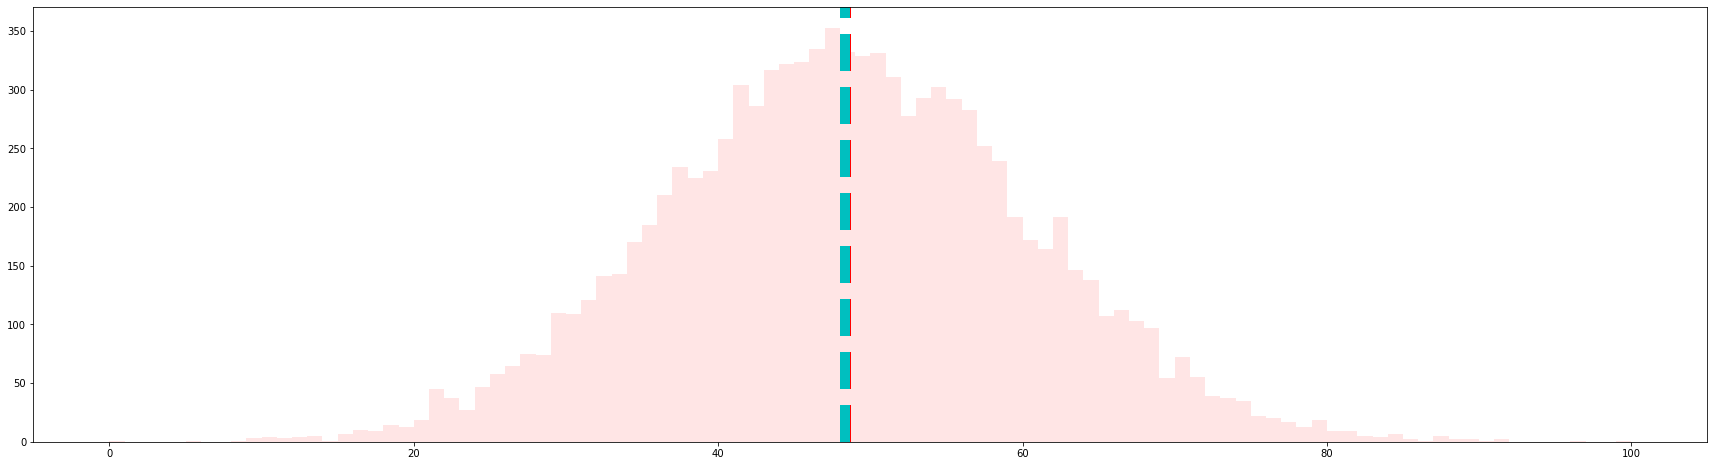

In [54]:
# Valor da distorcao
skewness = 0

maxValue = 100
random = skewnorm.rvs(a = skewness,loc = maxValue, size = 10000)
random = random - min(random)      
random = random / max(random)      #Standadize all the vlues between 0 and 1. 
random = random * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.figure(figsize = (30, 8))
plt.hist(random, 100, density= False, color = 'red', alpha=0.1)
plt.axvline(np.mean(random), color='r', linestyle='dashed', linewidth=10) 
plt.axvline(st.median(random), color='c', linestyle='dashed', linewidth=10)
plt.show()